In [2]:


!pip install tensorflow
!pip install tensorflow scikit-learn seaborn matplotlib pandas numpy


  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-4.25.8-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-macosx_10_9_x86_64.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 MB 4.7 MB/s  0:00:53m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 7.0 MB/s  0:00:01 eta 0:00:01
Using cached protobuf-4.25.8-cp37-abi3-macosx_10_9_universal2.whl (394 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.5 MB/s  0:00:00 eta 0:00:01
Using cached tensorboard_data_server-0.7.2-py

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = pd.read_csv("MobilePriceDataset.csv')

# Changing pandas dataframe to numpy array 
X_data = data.iloc[:, :20].values
y = data.iloc[:, 20:21].values

In [ ]:
# Split dataset into 80% train and 20% test 
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=42)

In [ ]:
# Normalizing using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Define model architecture 
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_shape=(20,), activation='sigmoid'))
model.add(keras.layers.Dense(12, activation='sigmoid'))
model.add(keras.layers.Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train (Choose between 100-120 epochs) 
model.fit(X_train, y_train, epochs=110)

Epoch 1/110


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2280 - loss: 1.4215
Epoch 2/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2466 - loss: 1.3866
Epoch 3/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2743 - loss: 1.3736
Epoch 4/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3254 - loss: 1.3652
Epoch 5/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3486 - loss: 1.3555
Epoch 6/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4257 - loss: 1.3380
Epoch 7/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4148 - loss: 1.3174
Epoch 8/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4479 - loss: 1.2928
Epoch 9/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4547 - loss: 1.2626
Epoch 10/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4672 - loss: 1.2160
Epoch 11/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5478 - loss: 1.1707
Epoch 12/110
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6093 - lo

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


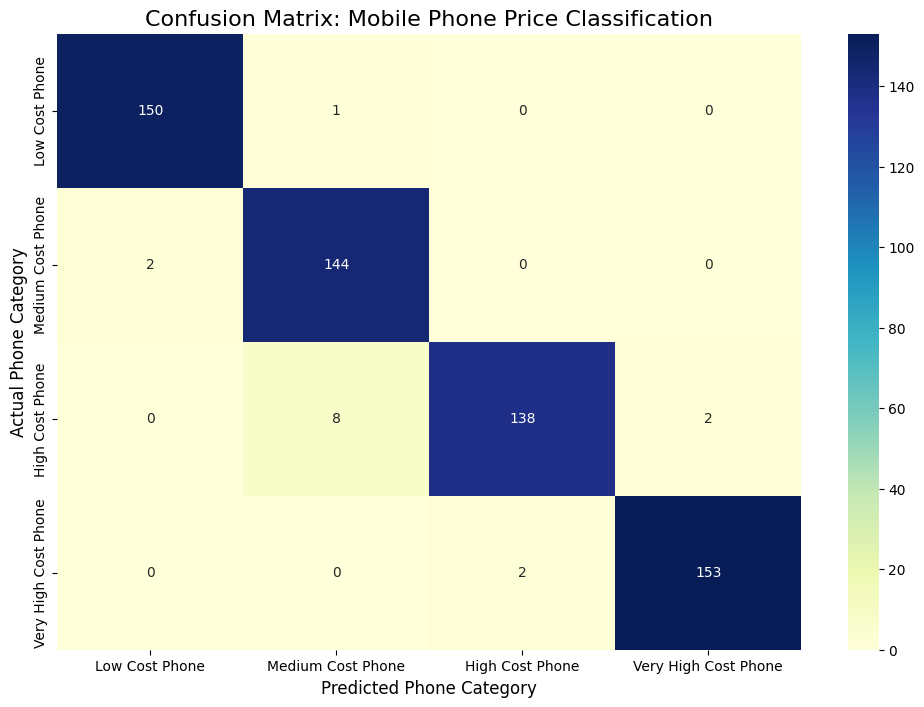

In [ ]:


# 1. Get predictions from the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Define clear labels for mobile phones categories
phone_labels = [
    'Low Cost Phone',
    'Medium Cost Phone',
    'High Cost Phone',
    'Very High Cost Phone'
]

# 3. Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=phone_labels,
            yticklabels=phone_labels)

plt.title('Confusion Matrix: Mobile Phone Price Classification', fontsize=16)
plt.xlabel('Predicted Phone Category', fontsize=12)
plt.ylabel('Actual Phone Category', fontsize=12)
plt.show()

In [ ]:
# 1. Calculate Accuracy for Training Data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# 2. Calculate Accuracy for Testing Data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("---------------------------------------")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy:  {test_accuracy * 100:.2f}%")
print("---------------------------------------")

# Comparison Logic
if train_accuracy > test_accuracy + 0.05:
    print("Result: There might be some Overfitting.")
else:
    print("Result: The model is performing well on both sets (No Overfitting).")

---------------------------------------
Training Accuracy: 99.07%
Testing Accuracy:  97.50%
---------------------------------------
Result: The model is performing well on both sets (No Overfitting).
